In [1]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Part 1:


## players data: 
There are **196** observations. 

**Number of Variables**: 

**experience**: Player's experience level (character: "Pro", "Veteran", "Amateur", "Regular").

**subscribe**: Whether the player is subscribed (character: True/False).

**hashedEmail**: Unique identifier for players (character).

**name**: Player's name (character).

**gender**: Player's gender (character: "Male", "Female").

**Age**: Player's age (numeric).

**played_hours**: Number of hours the player has played (numeric).

**data issue**: There are some missing values in the Age column. 

In [8]:
players <- read.csv("data/players.csv")
players

Warning message in file(file, "rt"):
“cannot open file 'data/players.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


## session data:

There are **1535** observations.

**hashedEmail**: Unique identifier for users (character).

**start_time**: Session start time (character: datetime).

**end_time**: Session end time (character: datetime).

**original_start_time**: Unix timestamp for session start (numeric).

**original_end_time**: Unix timestamp for session end (numeric).

**data issue**: the start_time and end_time columns are not tidy, we should split the year, month, date, and time. 

In [9]:
session <- read.csv("data/sessions.csv")
session

Warning message in file(file, "rt"):
“cannot open file 'data/sessions.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


# Part 2: Questions

If we want to answer the question "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?", we need to find “Can player characteristics such as age, experience level, and hours played predict the likelihood of subscribing to a game-related newsletter？” In this specific question, the dependent variable is **subcribe**, and the independent variable **experience**, **age**, and **play_hours**.To prepare the data, I will handle missing values by imputing or removing them. I will also transform other categorical variables, like gender, appropriately. Numerical columns, such as age and played_hours, will be checked for outliers and standardized to prepare to make a recipe. Finally, I will split the data into training and testing sets to ensure it’s ready for analysis.

# Part 3: Exploratory Data Analysis and Visualization

In [7]:
players

ERROR: Error in eval(expr, envir, enclos): object 'players' not found


In [11]:
numeric_vars <- players |>
select(played_hours, Age)
mean_table <- numeric_vars |>
  summarise(average_played_hours = mean(played_hours, na.rm = TRUE),
    average_age = mean(Age, na.rm = TRUE))
mean_table

average_played_hours,average_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


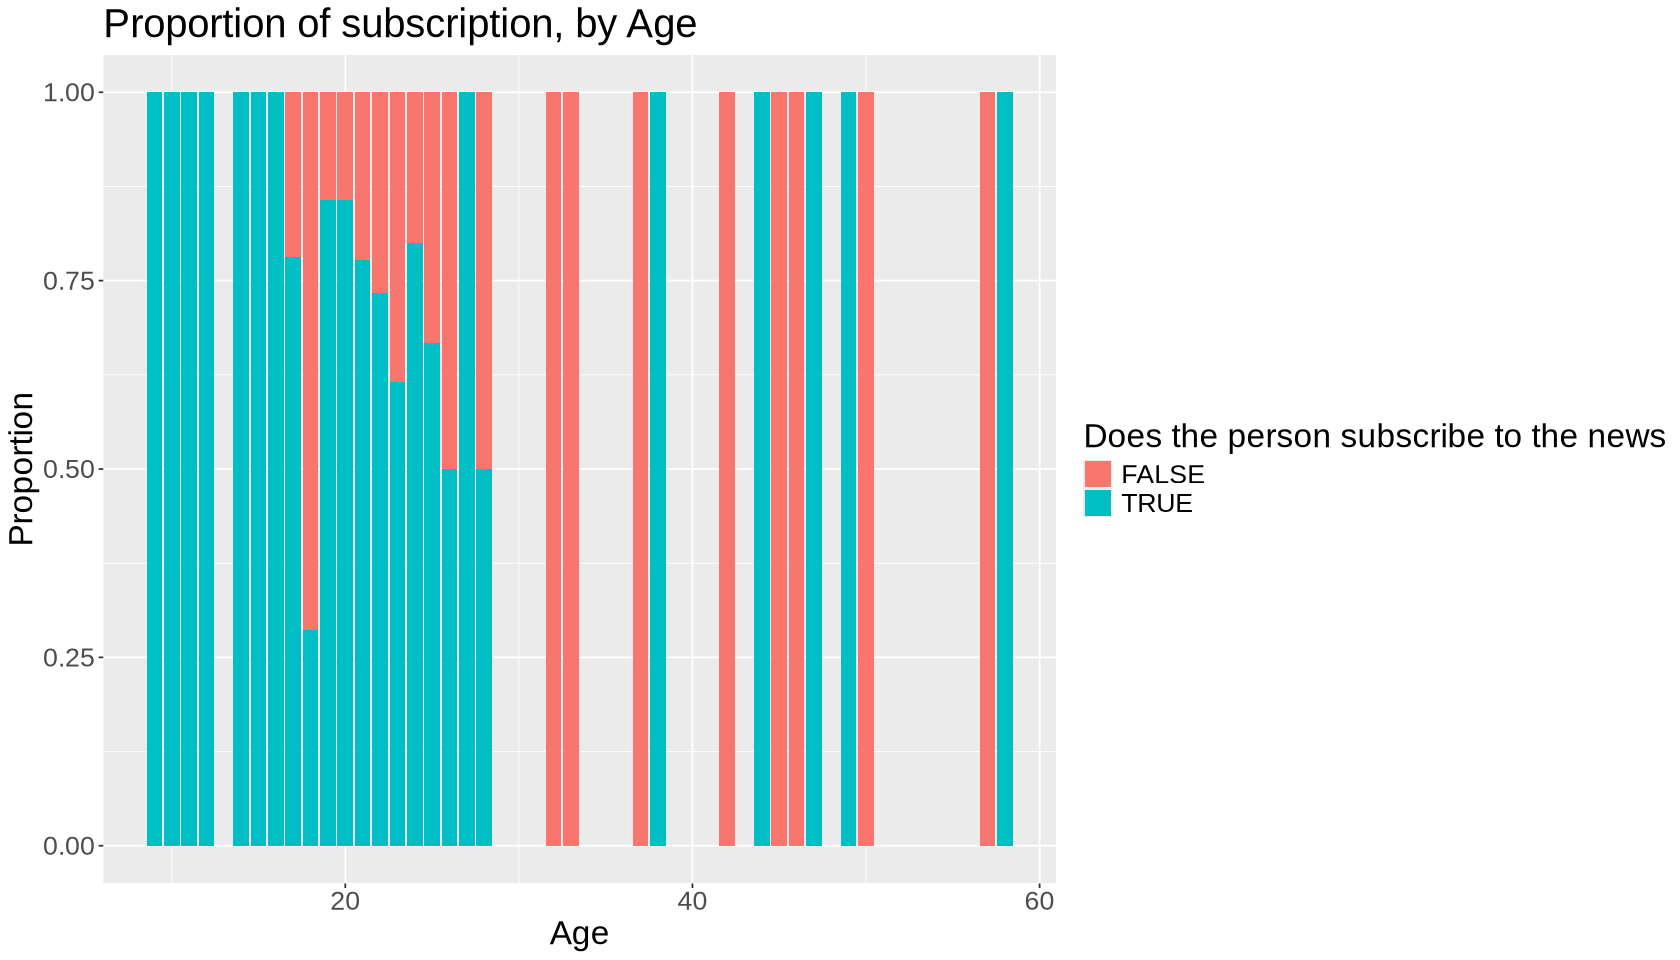

In [49]:
options(repr.plot.width = 14, repr.plot.height = 8)
age_plot <- players |>
  ggplot(aes(x = Age, fill = factor(subscribe))) + 
  geom_bar(position = 'fill') +
  xlab('Age') +
  ylab('Proportion') +
  labs(fill = "Does the person subscribe to the news") +
  ggtitle('Proportion of subscription, by Age') +
  theme(text = element_text(size = 20))  
age_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


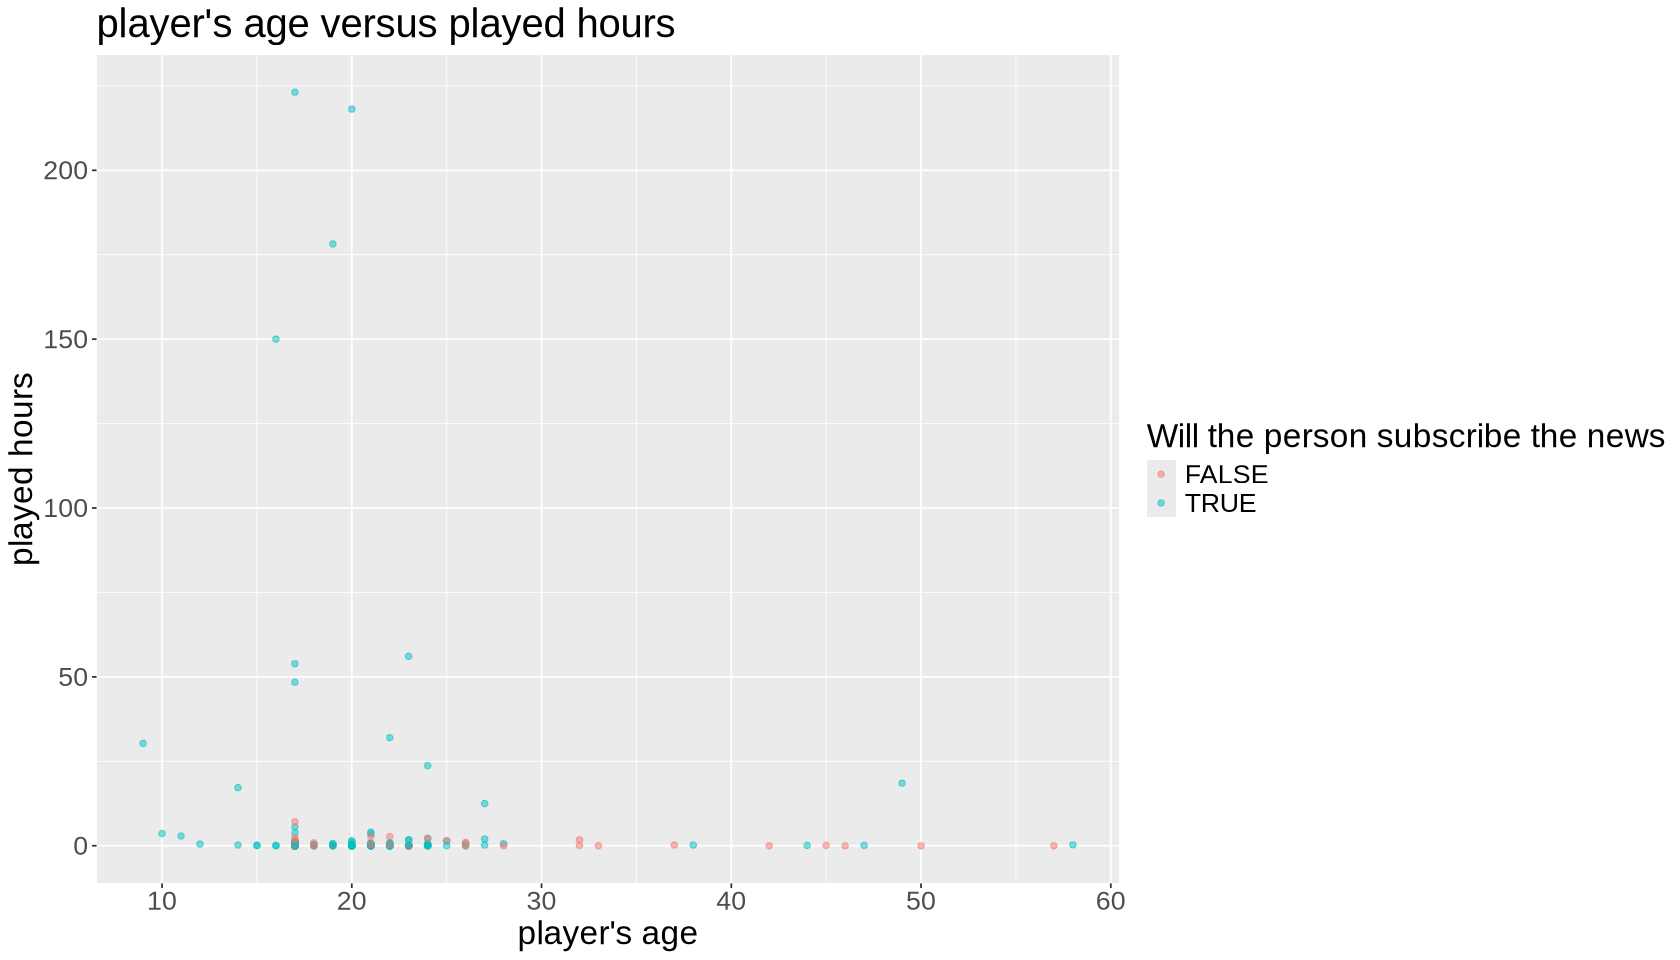

In [50]:
options(repr.plot.width = 14, repr.plot.height = 8)
age_times_plot <- players |>
    ggplot(aes(x = Age, y =  played_hours, colour = subscribe)) + 
        geom_point(alpha = 0.5) +
        xlab("player's age") +
        ylab("played hours") +
        labs(colour = "Will the person subscribe the news") +
        ggtitle("player's age versus played hours") +
        theme(text = element_text(size = 20))

age_times_plot 

In [8]:
options(repr.plot.width = 14, repr.plot.height = 8)
experience_plot <- ggplot(players, aes(x = experience, fill = factor(subscribe))) +  
  geom_bar(position = 'fill') +
  xlab('Experience Level') +
  ylab('Proportion of subscription') +
  labs(fill = "Does the person subscribe to the news") +
  ggtitle('Subscription Proportion by Experience Level') +
  theme(text = element_text(size = 20))
experience_plot

ERROR: Error in eval(expr, envir, enclos): object 'players' not found


The visualizations show that there is a relation between subscription status and factors like age and experience level. Th The scatter plot of age versus played hours shows a mix of subscribed and non-subscribed players, with some outliers in played hours, particularly with extremely high values, which may distort the overall trends. These outliers should be addressed to better understand the general pattern in played hours, as they might be skewing the results and making it harder to see a clear relationship.

# Part 4:

I propose using k-NN Classification to predict whether a player subscribes to the game-related newsletter based on features like age, experience level, and played hours. k-NN is appropriate because it classifies new data points based on the majority class of their nearest neighbors, making it well-suited for binary outcomes like subscription status. The assumptions are that similar players, like age, experience, and played hours, should have similar subscription behavior. The potential limitation is that k-NN can be sensitive to the scale of the features, so data should be standardized. I will evaluate the model using accuracy and cross-validation (k-folds) to avoid overfitting. The data will be split into 80% for training and 20% for testing, with cross-validation used to assess model performance.